# Loading the dataset using pandas

In [ ]:
import pandas as pd
df = pd.read_csv("******.csv")

## Exploring column names

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

## Cleaning the column names (making lowercase, removing special characters, replacing spaces with _)

In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_", regex=True).str.replace("[^a-z0-9_]", "", regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

## Filtering the dataset to include only schools located in Brooklyn

In [4]:
df['borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [5]:
df_brooklyn=df[df['borough'] == 'Brooklyn']

In [6]:
df_brooklyn['borough'].unique()

array(['Brooklyn'], dtype=object)

## How many total schools are in Brooklyn? (use the method that counts only unique values. Also there is a column that has a unique identifier for schools.)

In [7]:
df_brooklyn['school_name'].nunique()

121

In [8]:
df_brooklyn['dbn'].nunique()

121

### Answer: 121 schools

## How many schools in Brooklyn offer Grade 9 entry? (here you need to use range to get the correct answer for example just stating min_grade entry >=9 will miss the schools that offer earlier entry))

In [9]:
df_brooklyn.describe()

,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,postcode,total_students,number_programs,community_board,council_district,census_tract,bin,bbl,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
count,121.000000,121.000000,5.000000,5.000000,121.000000,119.000000,121.000000,121.000000,121.000000,121.000000,1.210000e+02,1.210000e+02,121.000000,121.000000,121.0,121.000000,121.000000
mean,8.429752,11.933884,8.400000,12.400000,11216.157025,699.134454,1.851240,7.685950,38.958678,812.231405,3.147492e+06,3.035851e+09,16453.280992,37.652893,2.0,31.256198,47.107438
std,1.181993,0.381566,1.341641,0.894427,11.712535,888.583666,1.563443,5.492469,4.899654,3291.737195,1.204235e+05,2.408111e+07,1698.663039,21.847849,0.0,13.064283,6.490765
min,6.000000,9.000000,6.000000,12.000000,11201.000000,85.000000,1.000000,1.000000,33.000000,11.000000,3.000216e+06,3.001200e+09,13509.000000,1.000000,2.0,7.000000,35.000000
25%,9.000000,12.000000,9.000000,12.000000,11207.000000,318.000000,1.000000,3.000000,35.000000,230.000000,3.057942e+06,3.015180e+09,13829.000000,17.000000,2.0,18.000000,43.000000
50%,9.000000,12.000000,9.000000,12.000000,11214.000000,421.000000,1.000000,6.000000,38.000000,435.000000,3.095977e+06,3.033650e+09,17214.000000,36.000000,2.0,37.000000,47.000000
75%,9.000000,12.000000,9.000000,12.000000,11225.000000,585.500000,2.000000,13.000000,42.000000,810.000000,3.224139e+06,3.051030e+09,17616.000000,60.000000,2.0,38.000000,53.000000
max,9.000000,12.000000,9.000000,14.000000,11238.000000,5458.000000,8.000000,18.000000,48.000000,36501.000000,3.413878e+06,3.087600e+09,18184.000000,69.000000,2.0,49.000000,57.000000


### For this task, we need to filter all schools where the grade_span_min is less than or equal to 9, and the grade_span_max is greater than or equal to 9

In [14]:
grade_filter=(df_brooklyn[(df_brooklyn['grade_span_min'] <= 9) & (df_brooklyn['grade_span_max'] >= 9)])
grade_filter['dbn'].nunique()

121

### Answer: 121 schools

## Count of schools per borough (again unique schools)

In [15]:
df['borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [16]:
df.groupby('borough')['school_name'].nunique()

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: school_name, dtype: int64

In [17]:
df.groupby('borough')['dbn'].nunique()

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

## Average number of students per borough

In [18]:
df.groupby('borough')['total_students'].mean()

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64

## Summary of grade_span_max grouped by borough (use the method that provides you with basic statistics about that column)

In [19]:
df.groupby('borough')['grade_span_max'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


## Bar chart: Number of schools per borough

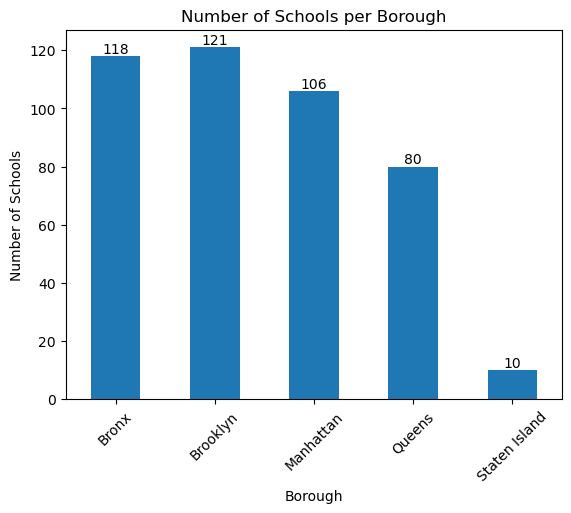

In [20]:
import matplotlib.pyplot as plt

# Counting unique schools per borough
schools_per_borough = df.groupby('borough')['school_name'].nunique()

# Creating the bar chart
bar_plot = schools_per_borough.plot(kind='bar')

# Adding bar labels
bar_plot.bar_label(bar_plot.containers[0])

# Adding a title and labels
plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')

# Rotating the x-axis labels
plt.xticks(rotation=45)

plt.show()

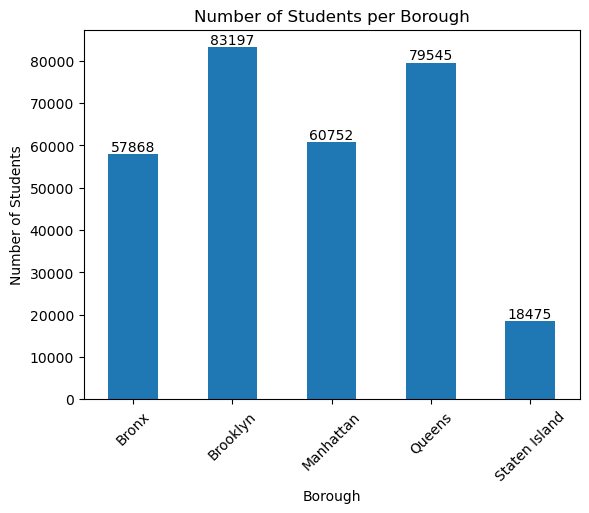

In [58]:
# Counting students per borough
students_per_borough = df.groupby('borough')['total_students'].sum()

# Creating the bar chart
bar_stud = students_per_borough.plot(kind='bar')

# Adding bar labels
bar_stud.bar_label(bar_stud.containers[0])

# Adding a title and labels
plt.title('Number of Students per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Students')

# Rotating the x-axis labels
plt.xticks(rotation=45)

plt.show()

## Average number of students per school per borough

In [22]:
# Counting avg of students per school per borough
df.groupby('borough')['total_students'].mean()

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64

### Insight 1: Difference Between Number of Schools and Population

Based on the charts, we can conclude that the number of schools directly correlates with the total student population in a borough. However, this isn't the most interesting finding. It is far more valuable to focus on the **average number of students per school**.

---

### Insight 2: School Efficiency and Size

**Staten Island** and **Queens** have the highest average number of students per school, whereas the **Bronx**, **Brooklyn** and **Manhattan** and have significantly lower average values.

This insight shows that schools in boroughs like **Staten Island** and **Queens** are, on average, much larger and more densely populated than those in other boroughs. This may be due to:

* **Type of schools**: There may be a prevalence of large schools over specialized or smaller ones.
* **Resource Distribution**: Larger schools may have more resources but also face challenges related to managing a larger student body.
* **Demographic Density**: The population in these boroughs may be more concentrated, requiring larger educational facilities to meet the needs of residents.

---

### Insight 3: Comparative Borough Analysis

**Brooklyn** has the largest number of schools and students. **Queens** has fewer schools (80) than the **Bronx** (118) but nearly twice the average number of students per school.

This shows that despite similar sizes, boroughs can have completely different educational infrastructures. While **Brooklyn** and the **Bronx** prefer a model with a large number of small and medium-sized schools, **Queens** is betting on a smaller number of larger schools. This observation can be useful for planning future educational policy, for example, when deciding whether to build new large schools or several smaller ones to meet the needs of the population.